In [18]:
!pip install librosa soundfile scikit-learn joblib


In [19]:
import os
import librosa
import numpy as np
import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report


In [20]:
emotion_map = {
    "01": "neutral",
    "02": "calm",
    "03": "happy",
    "04": "sad",
    "05": "angry",
    "06": "fearful",
    "07": "disgust",
    "08": "surprised"
}

In [21]:
def extract_features(file_path):
    audio, sample_rate = librosa.load(file_path, res_type='kaiser_fast')
    mfccs = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    return np.mean(mfccs.T, axis=0)


In [22]:
def load_ravdess_dataset(dataset_path):
    features, labels = [], []

    for file in os.listdir(dataset_path):
        if file.endswith('.wav'):
            try:
                emotion_code = file.split('-')[2]
                emotion = emotion_map.get(emotion_code)
                if emotion:
                    file_path = os.path.join(dataset_path, file)
                    mfcc = extract_features(file_path)
                    features.append(mfcc)
                    labels.append(emotion)
            except Exception as e:
                print(f"Failed on file {file}: {e}")
    
    return np.array(features), np.array(labels)


In [23]:
!pip install resampy

In [24]:
data_path = r"C:\Users\Thaar\OneDrive\Desktop\project 1\voice_recordings" 
X, y = load_ravdess_dataset(data_path)

In [25]:
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [27]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred = model.predict(X_test)
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=le.classes_))

Classification Report:

              precision    recall  f1-score   support

       angry       0.67      0.65      0.66        37
        calm       0.58      0.97      0.72        35
     disgust       0.50      0.66      0.57        35
     fearful       0.69      0.51      0.59        43
       happy       0.58      0.59      0.59        37
     neutral       1.00      0.32      0.48        19
         sad       0.76      0.50      0.60        44
   surprised       0.64      0.71      0.68        38

    accuracy                           0.62       288
   macro avg       0.68      0.61      0.61       288
weighted avg       0.66      0.62      0.62       288



In [29]:
joblib.dump(model, "ravdess_mood_classifier.pkl")
joblib.dump(le, "label_encoder.pkl")


['label_encoder.pkl']

In [30]:
def predict_emotion(file_path):
    model = joblib.load("ravdess_mood_classifier.pkl")
    le = joblib.load("label_encoder.pkl")
    features = extract_features(file_path).reshape(1, -1)
    prediction = model.predict(features)
    return le.inverse_transform(prediction)[0]

In [31]:
test_audio = r"C:\Users\Thaar\Downloads\OAF_bean_angry.wav"  
print(f"Predicted Emotion: {predict_emotion(test_audio)}")

Predicted Emotion: happy


In [32]:
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy * 100:.2f}%")

Model Accuracy: 62.50%


In [33]:
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred, target_names=le.classes_))

              precision    recall  f1-score   support

       angry       0.67      0.65      0.66        37
        calm       0.58      0.97      0.72        35
     disgust       0.50      0.66      0.57        35
     fearful       0.69      0.51      0.59        43
       happy       0.58      0.59      0.59        37
     neutral       1.00      0.32      0.48        19
         sad       0.76      0.50      0.60        44
   surprised       0.64      0.71      0.68        38

    accuracy                           0.62       288
   macro avg       0.68      0.61      0.61       288
weighted avg       0.66      0.62      0.62       288



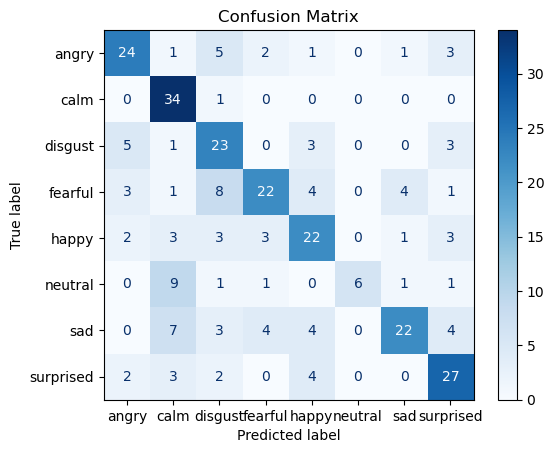

In [34]:
 import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()